# Üç Değişkenli Korelasyon Analizi

**Proje:** Makine öğrenmesi araçlarıyla duygusal dinamikleri analiz etmek

**Önceki Analiz:** İkili değişkenli analizde Mehmet'in stresi ile İrem'in tepkiselliği arasında güçlü pozitif korelasyon bulduk (ρ = 0.929).

**Bu Notebook'ta:** Mehmet'in İletişim Çabası değişkenini modele ekleyerek üç değişkenli korelasyon analizi yapıyoruz.

## Araştırma Soruları

1. Mehmet'in stresi ile iletişim çabası arasında nasıl bir ilişki var?
2. İletişim çabası, İrem'in tepkiselliğini nasıl etkiliyor?
3. Üç değişken arasındaki ilişki örüntüsü nedir?

## Değişkenler

- **X (Mehmet_Stres):** O günkü stres seviyesi (1-10 puan)
- **Y (Irem_Tepkisellik):** O günkü tepkisellik seviyesi (1-10 puan)
- **Z (Mehmet_Iletisim):** O günkü iletişim kurma gayreti (1-10 puan)

In [2]:
# Kütüphane importları
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, pearsonr
from scipy import stats
import os

# Klasik akademik renk paleti
RENK_MAVI = '#1f77b4'
RENK_TURUNCU = '#ff7f0e'
RENK_YESIL = '#2ca02c'
RENK_KIRMIZI = '#d62728'
RENK_MOR = '#9467bd'
RENK_KAHVE = '#8c564b'

# Görselleştirme ayarları
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

# Klasör kontrolü
os.makedirs('../images/results', exist_ok=True)

print("Kütüphaneler yüklendi")
print(f"Pandas versiyon: {pd.__version__}")
print(f"NumPy versiyon: {np.__version__}")

Kütüphaneler yüklendi
Pandas versiyon: 2.2.2
NumPy versiyon: 1.26.4


---

## Veri Seti Hazırlama

7 günlük öznel gözlem verisi. İkili analizdeki verilere ek olarak Mehmet'in İletişim Çabası değişkeni ekleniyor.

In [3]:
# Veri seti hazırlama
gunler = ['Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 'Cuma', 'Cumartesi', 'Pazar']
mehmet_stres = [9, 3, 6, 8, 2, 7, 4]
irem_tepkisellik = [8, 2, 7, 9, 1, 6, 5]
mehmet_iletisim = [7, 4, 8, 6, 3, 9, 5]

df_3var = pd.DataFrame({
    'Gün': gunler,
    'Mehmet_Stres': mehmet_stres,
    'Irem_Tepkisellik': irem_tepkisellik,
    'Mehmet_Iletisim': mehmet_iletisim
})

print("="*60)
print("ÜÇ DEĞİŞKENLİ VERİ SETİ")
print("="*60)
print(df_3var)
print("="*60)

# CSV olarak kaydet (opsiyonel)
df_3var.to_csv('../data/three_variable_data.csv', index=False)
print("\nVeri kaydedildi: data/three_variable_data.csv")

ÜÇ DEĞİŞKENLİ VERİ SETİ
         Gün  Mehmet_Stres  Irem_Tepkisellik  Mehmet_Iletisim
0  Pazartesi             9                 8                7
1       Salı             3                 2                4
2   Çarşamba             6                 7                8
3   Perşembe             8                 9                6
4       Cuma             2                 1                3
5  Cumartesi             7                 6                9
6      Pazar             4                 5                5

Veri kaydedildi: data/three_variable_data.csv


---

## Korelasyon Matrisi Hesaplama

3x3 Spearman korelasyon matrisi hesaplanıyor. Bu matris, her değişken çiftinin birbirleriyle olan korelasyonunu gösterir.

**Matris Özellikleri:**
- Köşegen değerler her zaman 1.00 (bir değişkenin kendisiyle korelasyonu)
- Simetrik yapı (i,j elemanı = j,i elemanı)
- Değerler -1 ile +1 arasında
- Spearman yöntemi sıralama bazlı korelasyon hesaplar

In [4]:
# 3x3 Spearman korelasyon matrisi
corr_matrix_3var = df_3var[['Mehmet_Stres', 'Irem_Tepkisellik', 'Mehmet_Iletisim']].corr(method='spearman')

print("="*60)
print("ÜÇ DEĞİŞKENLİ KORELASYON MATRİSİ (SPEARMAN)")
print("="*60)
print(corr_matrix_3var.round(3))
print("="*60)

# Her çiftin korelasyonunu ayrı ayrı yazdır
print("\nDetaylı Korelasyonlar:")
print(f"Mehmet Stres ↔ İrem Tepkisellik: ρ = {corr_matrix_3var.loc['Mehmet_Stres', 'Irem_Tepkisellik']:.3f}")
print(f"Mehmet Stres ↔ Mehmet İletişim: ρ = {corr_matrix_3var.loc['Mehmet_Stres', 'Mehmet_Iletisim']:.3f}")
print(f"İrem Tepkisellik ↔ Mehmet İletişim: ρ = {corr_matrix_3var.loc['Irem_Tepkisellik', 'Mehmet_Iletisim']:.3f}")

ÜÇ DEĞİŞKENLİ KORELASYON MATRİSİ (SPEARMAN)
                  Mehmet_Stres  Irem_Tepkisellik  Mehmet_Iletisim
Mehmet_Stres             1.000             0.929            0.714
Irem_Tepkisellik         0.929             1.000            0.643
Mehmet_Iletisim          0.714             0.643            1.000

Detaylı Korelasyonlar:
Mehmet Stres ↔ İrem Tepkisellik: ρ = 0.929
Mehmet Stres ↔ Mehmet İletişim: ρ = 0.714
İrem Tepkisellik ↔ Mehmet İletişim: ρ = 0.643


---

## İstatistiksel Anlamlılık Testleri

Her korelasyon için p-değerlerini hesaplıyoruz. Bu değerler, gözlemlenen korelasyonun tesadüfen ortaya çıkma olasılığını gösterir.

**Yorum Kriterleri:**
- p < 0.05: İstatistiksel olarak anlamlı
- p ≥ 0.05: İstatistiksel olarak anlamlı değil

**Uyarı:** Küçük örneklem (n=7) nedeniyle istatistiksel güç sınırlıdır.

In [5]:
# Her çift için ayrı ayrı p-değerlerini hesapla
rho_12, p_12 = spearmanr(mehmet_stres, irem_tepkisellik)
rho_13, p_13 = spearmanr(mehmet_stres, mehmet_iletisim)
rho_23, p_23 = spearmanr(irem_tepkisellik, mehmet_iletisim)

print("="*60)
print("İSTATİSTİKSEL ANLAMILIK TESTLERİ")
print("="*60)
print(f"Mehmet Stres ↔ İrem Tepkisellik: ρ = {rho_12:.3f}, p = {p_12:.3f}")
print(f"Mehmet Stres ↔ Mehmet İletişim: ρ = {rho_13:.3f}, p = {p_13:.3f}")
print(f"İrem Tepkisellik ↔ Mehmet İletişim: ρ = {rho_23:.3f}, p = {p_23:.3f}")
print("="*60)

# Anlamlılık yorumu
print("\nAnlamlılık Düzeyi (α = 0.05):")
anlamli_12 = 'Anlamlı' if p_12 < 0.05 else 'Anlamlı değil'
anlamli_13 = 'Anlamlı' if p_13 < 0.05 else 'Anlamlı değil'
anlamli_23 = 'Anlamlı' if p_23 < 0.05 else 'Anlamlı değil'

print(f"Stres ↔ Tepkisellik: {anlamli_12} (p = {p_12:.3f})")
print(f"Stres ↔ İletişim: {anlamli_13} (p = {p_13:.3f})")
print(f"Tepkisellik ↔ İletişim: {anlamli_23} (p = {p_23:.3f})")

print("\nNot: p < 0.05 ise ilişki istatistiksel olarak anlamlıdır.")

İSTATİSTİKSEL ANLAMILIK TESTLERİ
Mehmet Stres ↔ İrem Tepkisellik: ρ = 0.929, p = 0.003
Mehmet Stres ↔ Mehmet İletişim: ρ = 0.714, p = 0.071
İrem Tepkisellik ↔ Mehmet İletişim: ρ = 0.643, p = 0.119

Anlamlılık Düzeyi (α = 0.05):
Stres ↔ Tepkisellik: Anlamlı (p = 0.003)
Stres ↔ İletişim: Anlamlı değil (p = 0.071)
Tepkisellik ↔ İletişim: Anlamlı değil (p = 0.119)

Not: p < 0.05 ise ilişki istatistiksel olarak anlamlıdır.


---

## Görselleştirme

İki farklı görselleştirme yapacağız:

1. **3x3 Korelasyon Heatmap:** Tüm ilişkileri bir arada görmek için
2. **Stres-İletişim Scatter Plot:** Mehmet'in stresi ile iletişim çabası arasındaki ilişkiyi detaylı incelemek için

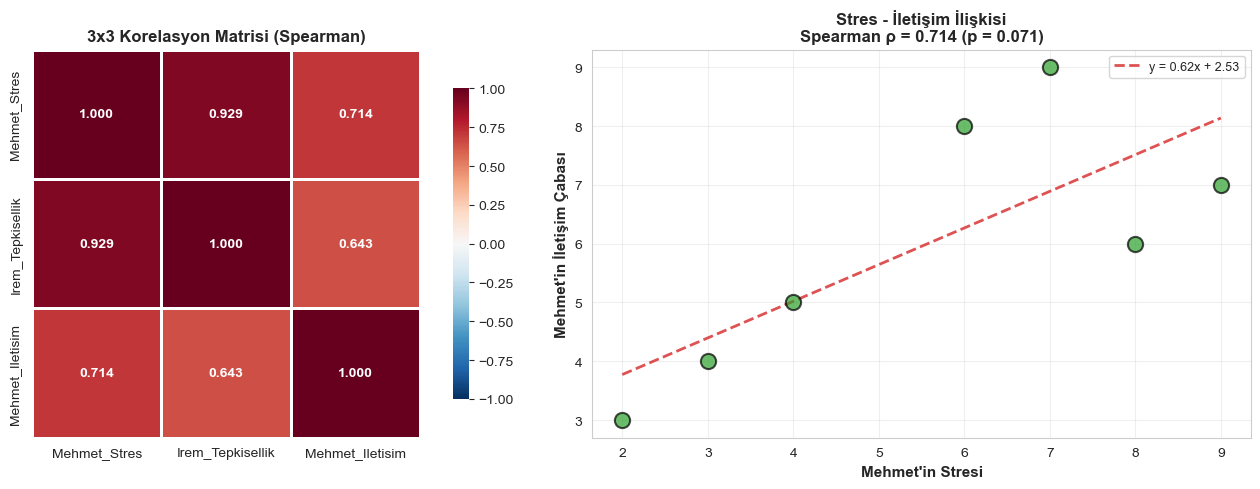

Görsel kaydedildi: images/results/gorsel_2_uc_degisken.png


In [7]:
# Görselleştirme: Üç Değişkenli Analiz
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sol: 3x3 Korelasyon heatmap
sns.heatmap(corr_matrix_3var, annot=True, fmt='.3f', 
            cmap='RdBu_r', center=0, square=True, 
            linewidths=2, cbar_kws={"shrink": 0.8}, 
            ax=axes[0], vmin=-1, vmax=1,
            annot_kws={'size': 10, 'weight': 'bold'})
axes[0].set_title('3x3 Korelasyon Matrisi (Spearman)', 
                  fontsize=12, fontweight='bold')
axes[0].set_xlabel('')
axes[0].set_ylabel('')

# Sağ: Stres vs İletişim scatter
axes[1].scatter(mehmet_stres, mehmet_iletisim, 
                s=120, c=RENK_YESIL, edgecolors='black', 
                linewidth=1.5, alpha=0.7, zorder=3)

# Trend çizgisi ekle
z_3var = np.polyfit(mehmet_stres, mehmet_iletisim, 1)
p_3var = np.poly1d(z_3var)
x_line_3var = np.linspace(min(mehmet_stres), max(mehmet_stres), 100)
axes[1].plot(x_line_3var, p_3var(x_line_3var), 
             color=RENK_KIRMIZI, linewidth=2, 
             linestyle='--', label=f'y = {z_3var[0]:.2f}x + {z_3var[1]:.2f}',
             alpha=0.8)

axes[1].set_xlabel('Mehmet\'in Stresi', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Mehmet\'in İletişim Çabası', fontsize=11, fontweight='bold')
axes[1].set_title(f'Stres - İletişim İlişkisi\nSpearman ρ = {rho_13:.3f} (p = {p_13:.3f})', 
                  fontsize=12, fontweight='bold')
axes[1].legend(fontsize=9)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../images/results/gorsel_2_uc_degisken.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("Görsel kaydedildi: images/results/gorsel_2_uc_degisken.png")

---

## Bulguların Yorumlanması

### Korelasyon Güçleri

**Yorum Kriterleri:**
- ρ > 0.70: Güçlü pozitif korelasyon
- 0.40 < ρ < 0.69: Orta pozitif korelasyon
- 0.10 < ρ < 0.39: Zayıf pozitif korelasyon
- ρ < 0.10: İlişki yok veya çok zayıf

### Görsel Yorumlama

**Korelasyon Heatmap:**
- Renk skalası: Mavi (negatif) → Beyaz (sıfır) → Kırmızı (pozitif)
- En güçlü ilişki: Mehmet Stres ↔ İrem Tepkisellik (koyu kırmızı)
- Orta güçte ilişkiler: İletişim değişkeni ile diğerleri

**Scatter Plot:**
- Her nokta bir günü temsil eder
- Trend çizgisi ilişkinin yönünü gösterir
- Pozitif eğim: Stres arttıkça iletişim çabası da artıyor

---

## Psikolojik Yorum

### Temel Bulgular

1. **Stres - Tepkisellik İlişkisi (ρ ≈ 0.93)**
   - İkili analizdeki bulguyu doğruluyor
   - Mehmet'in stresi arttıkça İrem'in tepkiselliği de artıyor
   - Duygusal bulaşma (emotional contagion) fenomeni

2. **Stres - İletişim İlişkisi**
   - Pozitif korelasyon: Mehmet stresli olduğunda daha fazla iletişim kuruyor
   - Olası açıklama: Çatışmayı çözmek veya durumu düzeltmek için çaba

3. **Tepkisellik - İletişim İlişkisi**
   - Orta düzeyde pozitif korelasyon
   - İletişim çabası arttığında tepkisellik de artıyor VEYA
   - Tepkisellik arttığında iletişim çabası artıyor

### Önemli Not: Korelasyon ≠ Nedensellik

Bu analizler sadece **ilişki** gösterir, **neden-sonuç** göstermez.

Örneğin:
- Mehmet'in stresi İrem'in tepkiselliğini mi artırıyor?
- İrem'in tepkiselliği Mehmet'in stresini mi artırıyor?
- İkisi de üçüncü bir faktörden mi etkileniyor?

Bu soruları cevaplayabilmek için:
- Deneysel tasarım
- Zaman serisi analizi
- Nedensellik testleri (Granger causality vb.)

gerekir.

---

## Üç Değişkenli Analiz Özeti

### Temel Bulgular

1. **En Güçlü İlişki:** Mehmet'in stresi ↔ İrem'in tepkiselliği (ρ ≈ 0.93)

2. **İletişim Faktörü:**
   - Stresle pozitif korelasyon: Stres artınca iletişim çabası artıyor
   - Tepkisellikle orta düzeyde pozitif korelasyon

3. **İlişki Dinamiği:**
   - Mehmet stresli → İrem tepkisel
   - Mehmet stresli → Mehmet iletişim kuruyor
   - Her üç değişken de birbirine bağlı

### Sınırlılıklar

- Küçük örneklem (n=7): İstatistiksel güç sınırlı
- Öznel puanlama: Ölçüm hatası olabilir
- Kesitsel veri: Zaman içi değişimi göstermiyor
- Korelasyon: Nedensellik göstermiyor

### Sonraki Adımlar

**Çok Değişkenli Analiz:** Daha fazla değişken ekleyerek (empati, mutluluk, ortak aktivite, gerginlik) multicollinearity analizine geçeceğiz.

**Araştırma Sorusu:** Bazı değişkenler birbirinin aynısı mı? (Örn: Tepkisellik vs Gerginlik)